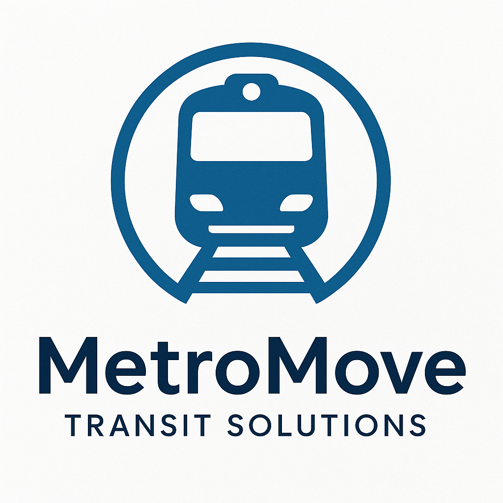

# OPTIMIZING PUBLIC TRANSIT OPERATIONS
An Exploratory Data Analysis of public transportation

## Business Introduction
MetroMove Transit Solutions is a public transportation service provider operating in multiple cities. 
They manage and analyze thousands of daily trips taken via buses, trains, ferries, and trams. 
The company's mission is to provide efficient, affordable, and timely public transportation services while leveraging data to improve passenger experience and optimize operations.

## Problem Statement
MetroMove has collected a large volume of trip data but lacks insights into trip performance, passenger behavior, and fare patterns due to messy, inconsistent, and incomplete records. As part of their new data-driven initiative, they want to clean, explore, and summarize their trip records to identify inefficiencies and patterns that can drive operational improvements.

## Rationale of the project
### Effective decision-making relies on
- Understanding passenger usage patterns.
- Evaluating the performance of different transport modes.
- Analyzing how trip characteristics impact customer experience.

### This project provides a real-world simulation by
- Requiring cleaning and preprocessing of raw data.
- Encouraging pattern discovery through exploratory data analysis.
- Developing skills in communicating data-driven insights.
- Working within the context of a transportation-focused dataset.

 ## Data Description
[image.png](attachment:4caf1028-dcb0-40e6-a01f-97b9b5fed2e3.png)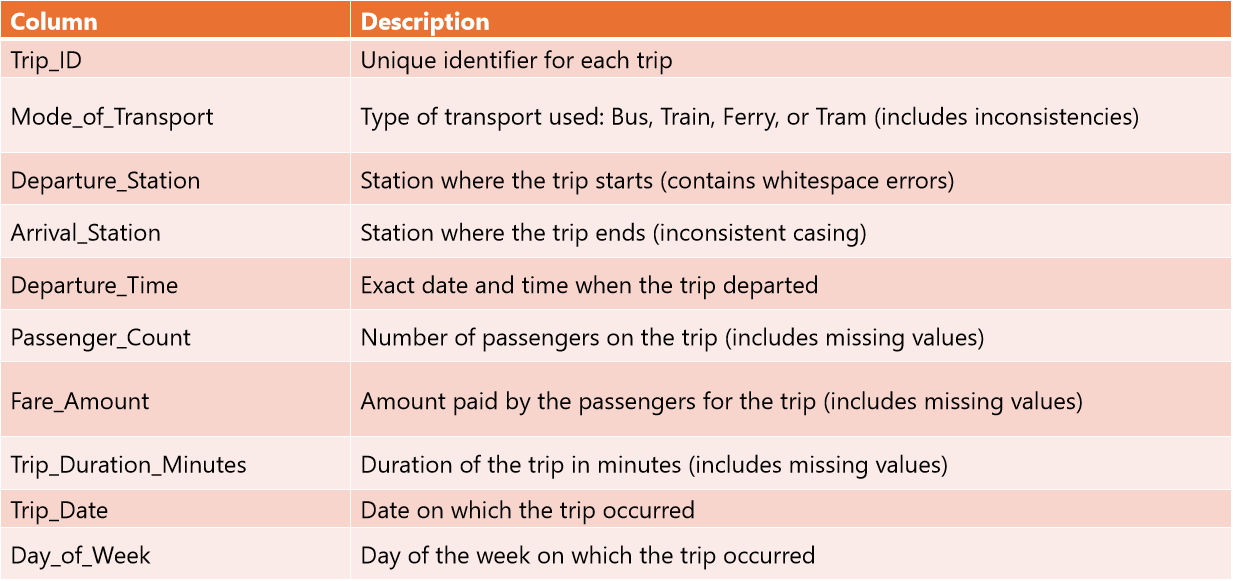
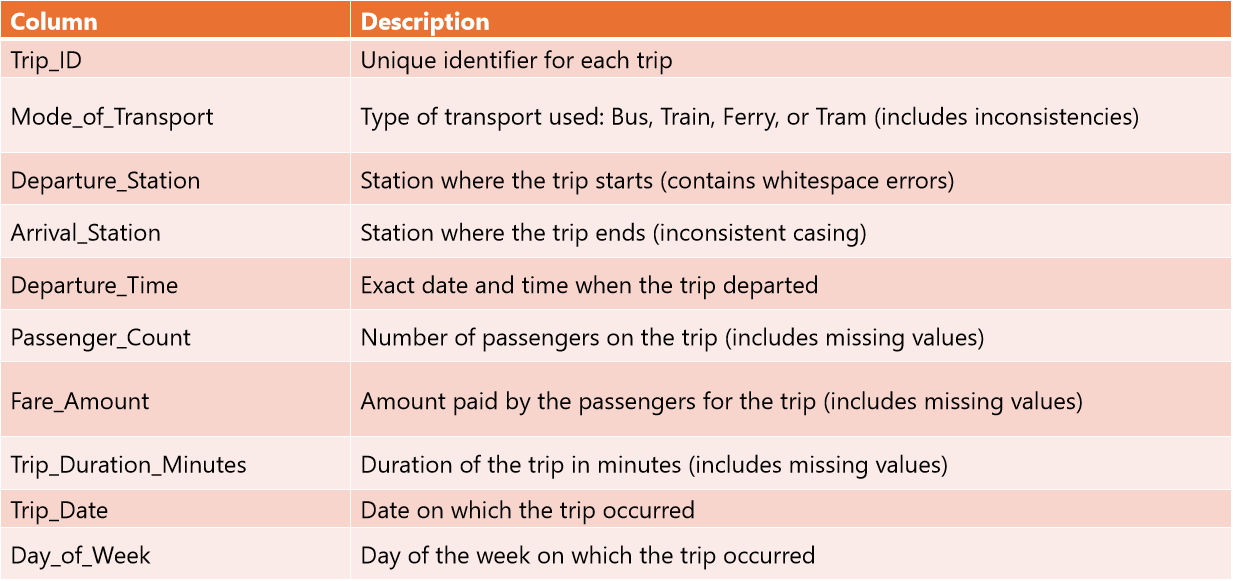

## Importing tools and Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd # Data preparation
import matplotlib.pyplot as plt   #Data Visualization
import seaborn as sns  
import missingno as msno  # Missing Data Visualization
from collections import Counter # Counting

In [2]:
# Load the dataset

df = pd.read_csv("Public_Transport_Trips_EDA1.csv")

In [3]:
# Understanding the data

df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [4]:
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday


In [5]:
# Dimensionality of the data - The number of rows and columns

df.shape

(1000, 10)

## Data Cleaning

In [6]:
# Investigate the dataset for anomalies and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                1000 non-null   object 
 1   Mode_of_Transport      1000 non-null   object 
 2   Departure_Station      1000 non-null   object 
 3   Arrival_Station        1000 non-null   object 
 4   Departure_Time         1000 non-null   object 
 5   Passenger_Count        900 non-null    float64
 6   Fare_Amount            900 non-null    float64
 7   Trip_Duration_Minutes  900 non-null    float64
 8   Trip_Date              1000 non-null   object 
 9   Day_of_Week            1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.2+ KB


In [7]:
# Convert columns to appropriate datatypes

df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])
df['Trip_Date'] = pd.to_datetime(df['Trip_Date'])

In [8]:
# Recheck dataset datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.2+ KB


In [9]:
# Investigate dataset for object inconsistencies in whitespacing and casing
# Select object columns
obj_cols = df.select_dtypes(include='object').columns

# 1. Whitespace Issues
whitespace_issues = {
    col: {
        'leading': df[col].str.match(r'^\s+').sum(),
        'trailing': df[col].str.match(r'.*\s+$').sum(),
        'multiple_spaces': df[col].str.contains(r'\s{2,}').sum()
    }
    for col in obj_cols
    if df[col].str.contains(r'^\s+|.*\s+$|\s{2,}', regex=True).any()
}

# 2. Case Inconsistency
case_issues = {
    col: {
        'lower': df[col].str.islower().sum(),
        'upper': df[col].str.isupper().sum(),
        'title': df[col].str.istitle().sum(),
        'mixed': len(df) - (
            df[col].str.islower().sum() +
            df[col].str.isupper().sum() +
            df[col].str.istitle().sum()
        )
    }
    for col in obj_cols
    if len(set(df[col].dropna().map(lambda x: x.lower() if isinstance(x, str) else x))) > 1
}

# 3. Format Inconsistency (hyphen, underscore, space)
format_issues = {
    col: {
        k: True for k in ['hyphen', 'underscore', 'space']
        if 0 < df[col].str.contains({'hyphen': '-', 'underscore': '_', 'space': ' '}[k]).sum() < len(df)
    }
    for col in obj_cols
    if any(0 < df[col].str.contains(c).sum() < len(df) for c in ['-', '_', ' '])
}

# Display results
def display_issue_report(title, issues):
    print(f"\n {title}")
    for col, details in issues.items():
        print(f" Column: {col}")
        for k, v in details.items():
            print(f"   - {k}: {v}")

display_issue_report("Whitespace Issues", whitespace_issues)
display_issue_report("Case Inconsistencies", case_issues)
display_issue_report("Format Inconsistencies", format_issues)



 Whitespace Issues
 Column: Departure_Station
   - leading: 50
   - trailing: 50
   - multiple_spaces: 0

 Case Inconsistencies
 Column: Trip_ID
   - lower: 0
   - upper: 1000
   - title: 0
   - mixed: 0
 Column: Mode_of_Transport
   - lower: 260
   - upper: 167
   - title: 523
   - mixed: 50
 Column: Departure_Station
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0
 Column: Arrival_Station
   - lower: 50
   - upper: 0
   - title: 950
   - mixed: 0
 Column: Day_of_Week
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0

 Format Inconsistencies
 Column: Departure_Station
   - space: True
 Column: Arrival_Station
   - space: True


In [10]:
# Fix case and whitespacing inconsistency in object dataset

df['Mode_of_Transport'] = df['Mode_of_Transport'].str.title().str.strip()
df['Arrival_Station'] = df['Arrival_Station'].str.title().str.strip()
df['Departure_Station'] = df['Departure_Station'].str.title().str.strip()

In [11]:
# Recheck that inconsistencis have been fixed


# Select object columns
obj_cols = df.select_dtypes(include='object').columns

# 1. Whitespace Issues
whitespace_issues = {
    col: {
        'leading': df[col].str.match(r'^\s+').sum(),
        'trailing': df[col].str.match(r'.*\s+$').sum(),
        'multiple_spaces': df[col].str.contains(r'\s{2,}').sum()
    }
    for col in obj_cols
    if df[col].str.contains(r'^\s+|.*\s+$|\s{2,}', regex=True).any()
}

# 2. Case Inconsistency
case_issues = {
    col: {
        'lower': df[col].str.islower().sum(),
        'upper': df[col].str.isupper().sum(),
        'title': df[col].str.istitle().sum(),
        'mixed': len(df) - (
            df[col].str.islower().sum() +
            df[col].str.isupper().sum() +
            df[col].str.istitle().sum()
        )
    }
    for col in obj_cols
    if len(set(df[col].dropna().map(lambda x: x.lower() if isinstance(x, str) else x))) > 1
}

# 3. Format Inconsistency (hyphen, underscore, space)
format_issues = {
    col: {
        k: True for k in ['hyphen', 'underscore', 'space']
        if 0 < df[col].str.contains({'hyphen': '-', 'underscore': '_', 'space': ' '}[k]).sum() < len(df)
    }
    for col in obj_cols
    if any(0 < df[col].str.contains(c).sum() < len(df) for c in ['-', '_', ' '])
}

# Display results
def display_issue_report(title, issues):
    print(f"\n {title}")
    for col, details in issues.items():
        print(f" Column: {col}")
        for k, v in details.items():
            print(f"   - {k}: {v}")

display_issue_report("Whitespace Issues", whitespace_issues)
display_issue_report("Case Inconsistencies", case_issues)
display_issue_report("Format Inconsistencies", format_issues)



 Whitespace Issues

 Case Inconsistencies
 Column: Trip_ID
   - lower: 0
   - upper: 1000
   - title: 0
   - mixed: 0
 Column: Mode_of_Transport
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0
 Column: Departure_Station
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0
 Column: Arrival_Station
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0
 Column: Day_of_Week
   - lower: 0
   - upper: 0
   - title: 1000
   - mixed: 0

 Format Inconsistencies
 Column: Departure_Station
   - space: True
 Column: Arrival_Station
   - space: True


In [12]:
# Investigate the missing data

null_vals = df.isnull().sum()

null_vals

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

<Axes: >

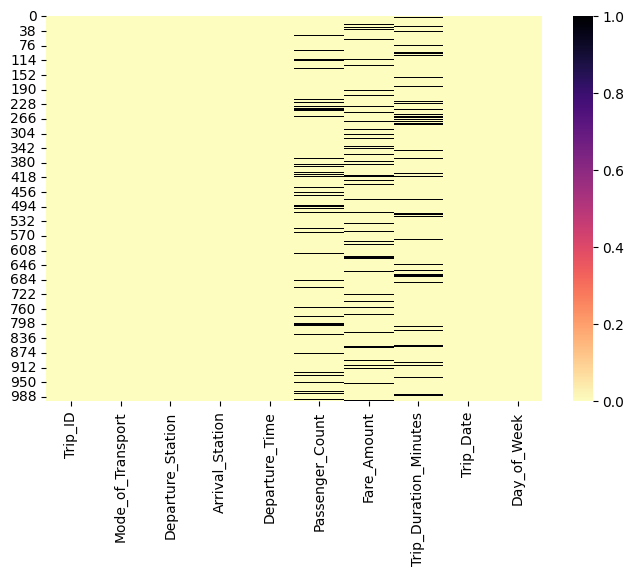

In [13]:
# Visualize the missing data

plt.figure(figsize =(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r")

In [14]:
# Impute missing numerical values with median (safer against outliers)

df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)
df['Fare_Amount'].fillna(df['Fare_Amount'].median(), inplace=True)
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median(), inplace=True)

In [15]:
# Verify cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.2+ KB


In [16]:
# Check for duplicates

duplicates = df.duplicated().sum()

duplicates

0

In [17]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday
3,TRIP0004,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday


In [18]:
# Extract Time from Departure_Time 

df['Departure_Time_Only'] = df['Departure_Time'].dt.time


In [19]:
# Generate Arrival Time using Departure Time

df['Arrival_Time'] = df['Departure_Time'] + pd.to_timedelta(df['Trip_Duration_Minutes'], unit='m')


In [20]:
# Extract Time from Arrival_Time 

df['Arrival_Time_Only'] = df['Arrival_Time'].dt.time

In [21]:
# Drop irrelevant Column

df.drop(["Trip_ID"], axis=1, inplace=True)

df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Departure_Time_Only,Arrival_Time,Arrival_Time_Only
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,06:00:00,2024-01-01 06:26:00,06:26:00
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,06:01:00,2024-01-01 08:15:00,08:15:00
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,06:02:00,2024-01-01 07:39:30,07:39:30
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,06:03:00,2024-01-01 07:40:30,07:40:30
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,06:04:00,2024-01-01 07:41:30,07:41:30


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Mode_of_Transport      1000 non-null   object        
 1   Departure_Station      1000 non-null   object        
 2   Arrival_Station        1000 non-null   object        
 3   Departure_Time         1000 non-null   datetime64[ns]
 4   Passenger_Count        1000 non-null   float64       
 5   Fare_Amount            1000 non-null   float64       
 6   Trip_Duration_Minutes  1000 non-null   float64       
 7   Trip_Date              1000 non-null   datetime64[ns]
 8   Day_of_Week            1000 non-null   object        
 9   Departure_Time_Only    1000 non-null   object        
 10  Arrival_Time           1000 non-null   datetime64[ns]
 11  Arrival_Time_Only      1000 non-null   object        
dtypes: datetime64[ns](3), float64(3), object(6)
memory usage: 93.9+

## Data Exploration

In [23]:
# Unique transport modes

print("Transport Modes:", df['Mode_of_Transport'].unique())

Transport Modes: ['Ferry' 'Tram' 'Bus' 'Train']


In [24]:
# Trip distribution per transport mode

print(df['Mode_of_Transport'].value_counts())

Bus      332
Ferry    287
Train    243
Tram     138
Name: Mode_of_Transport, dtype: int64


In [25]:
# Trip distribution by Departure stations

print(df['Departure_Station'].value_counts().head(10))

Central          208
North Station    171
Downtown         167
West End         159
Airport          157
South Point      138
Name: Departure_Station, dtype: int64


In [26]:
# Trip distribution by Arrival stations

print(df['Arrival_Station'].value_counts().head(10))

Airport          213
South Point      171
Downtown         168
West End         163
Central          160
North Station    125
Name: Arrival_Station, dtype: int64


In [27]:
# Summary by day of the week

print(df.groupby('Day_of_Week')['Passenger_Count'].mean())

Day_of_Week
Friday       46.352113
Monday       50.788732
Saturday     50.835616
Sunday       46.047904
Thursday     49.703390
Tuesday      50.925170
Wednesday    49.144928
Name: Passenger_Count, dtype: float64


In [28]:
# Total Passengers by Mode of Transport

df.groupby('Mode_of_Transport')['Passenger_Count'].sum().sort_values(ascending=False)

Mode_of_Transport
Bus      16280.0
Ferry    14304.0
Train    11435.0
Tram      7020.0
Name: Passenger_Count, dtype: float64

In [29]:
# Average Fare by Mode of Transport

df.groupby('Mode_of_Transport')['Fare_Amount'].mean().sort_values(ascending=False)


Mode_of_Transport
Train    26.156873
Bus      25.599548
Tram     25.254792
Ferry    24.476382
Name: Fare_Amount, dtype: float64

In [30]:
# Total Revenue per Departure Station

df.groupby('Departure_Station')['Fare_Amount'].sum().sort_values(ascending=False)



Departure_Station
Central          5384.199941
Downtown         4289.270547
Airport          4160.525341
North Station    4099.120077
West End         4087.612684
South Point      3344.324808
Name: Fare_Amount, dtype: float64

In [31]:
# Total Trips per Day of Week

df['Day_of_Week'].value_counts()

Sunday       167
Tuesday      147
Saturday     146
Monday       142
Friday       142
Wednesday    138
Thursday     118
Name: Day_of_Week, dtype: int64

In [32]:
# Average Trip Duration by Mode

df.groupby('Mode_of_Transport')['Trip_Duration_Minutes'].mean().sort_values()

Mode_of_Transport
Ferry    92.125436
Train    94.679012
Tram     95.373188
Bus      96.338855
Name: Trip_Duration_Minutes, dtype: float64

In [33]:
# Passenger Volume by Day of Week

df.groupby('Day_of_Week')['Passenger_Count'].sum().sort_values(ascending=False)

Day_of_Week
Sunday       7690.0
Tuesday      7486.0
Saturday     7422.0
Monday       7212.0
Wednesday    6782.0
Friday       6582.0
Thursday     5865.0
Name: Passenger_Count, dtype: float64

In [34]:
# Mode of transportation by fare amount (total, count and average)

df.groupby('Mode_of_Transport')['Fare_Amount'].agg(['sum', 'count', 'mean']).sort_values(by='sum', ascending=False)

,sum,count,mean
Mode_of_Transport,,,
Bus,8499.050102,332,25.599548
Ferry,7024.721698,287,24.476382
Train,6356.120257,243,26.156873
Tram,3485.161341,138,25.254792


In [35]:
# Step 1: Convert to timedelta
## df['Arrival_Time_Only'] = pd.to_timedelta(df['Arrival_Time_Only'])

df['Arrival_Time_Only'] = pd.to_timedelta(df['Arrival_Time_Only'].astype(str))

# Step 2: Convert to total minutes (as float)
df['Arrival_Minutes'] = df['Arrival_Time_Only'].dt.total_seconds() / 60

## Descriptive Statistics

In [36]:
# Summary statistics

df.describe()


,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Arrival_Time_Only,Arrival_Minutes
count,1000.000000,1000.000000,1000.000000,1000,1000.000000
mean,49.039000,25.365053,94.593000,0 days 15:22:24.780000,922.413000
std,26.277709,13.721526,48.043673,0 days 05:10:15.693701917,310.261562
min,1.000000,0.500576,5.000000,0 days 00:00:00,0.000000
25%,28.000000,13.917364,55.000000,0 days 11:29:45,689.750000
50%,48.000000,25.403856,97.500000,0 days 15:31:30,931.500000
75%,70.000000,36.580122,132.250000,0 days 19:39:15,1179.250000
max,99.000000,49.945184,179.000000,0 days 23:59:30,1439.500000


Insights: High standard deviation of Trip_Duration_Minutes shows route inefficiencies probably due to the short duration of same station travels.


In [37]:
# Summary of categorical variables

df.describe(include='object')


,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week,Departure_Time_Only
count,1000,1000,1000,1000,1000
unique,4,6,6,7,1000
top,Bus,Central,Airport,Sunday,06:00:00
freq,332,208,213,167,1


## Univariate, Bivariate and Multivariate Analysis

### Univariate Analysis

In [38]:
# Numerical Columns

numerical_columns = df.select_dtypes(include="number").columns

len(numerical_columns)

5

IndexError: index 3 is out of bounds for axis 0 with size 3

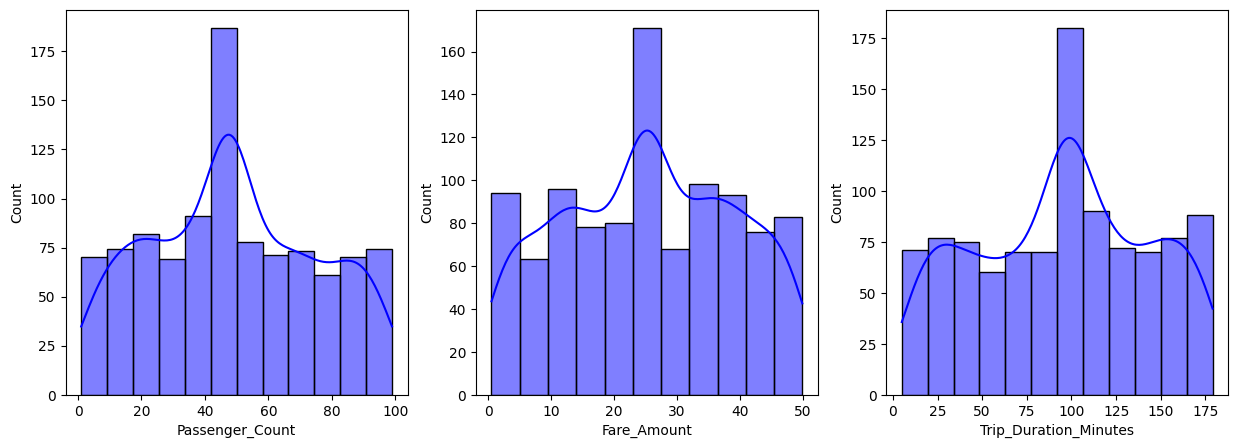

In [39]:
fig, position = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(df[column_name], color="blue", kde=True, ax=position[index])

plt.tight_layout()
plt.show()



Insights: The numerical variables are all skewed, the passenger count, shows most trips have same range of passenger except in a
few trip which has way more higher passenger count.
The fare amount is at a range for most trips, except a very few cases.
The trip duration showed that most trip are below the 100 minutes, except with a very few. 
It is necessary to conduct a correlation analysis to see if there is any relationship between the passenger count, fare amount and duration minutes, to
further understand our data better.

IndexError: index 3 is out of bounds for axis 0 with size 3

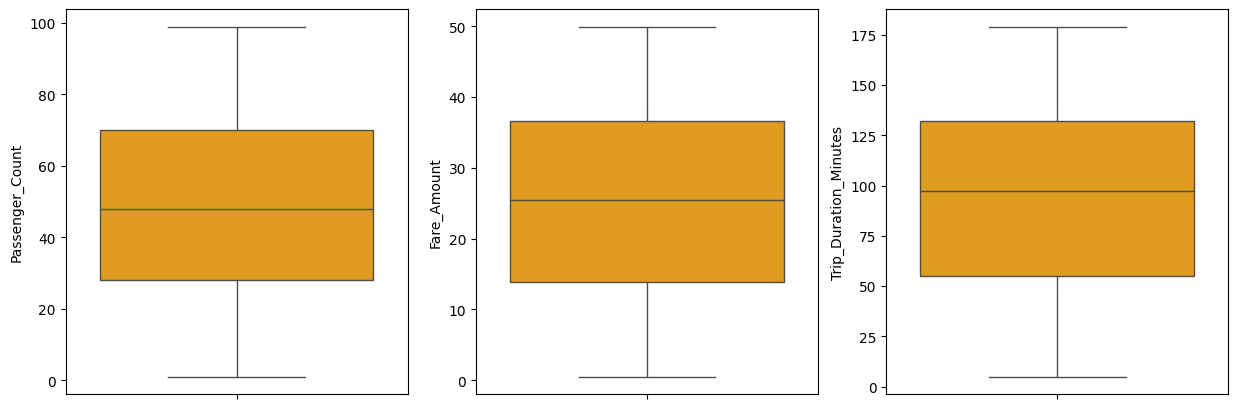

In [40]:
fig, position = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(df[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

Insights: No outliers in our numerical variables

In [41]:
# Categorical Column

categorical_columns = df.select_dtypes(include="object").columns

In [42]:
categorical_columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Day_of_Week', 'Departure_Time_Only'],
      dtype='object')

In [43]:
len(categorical_columns)

5

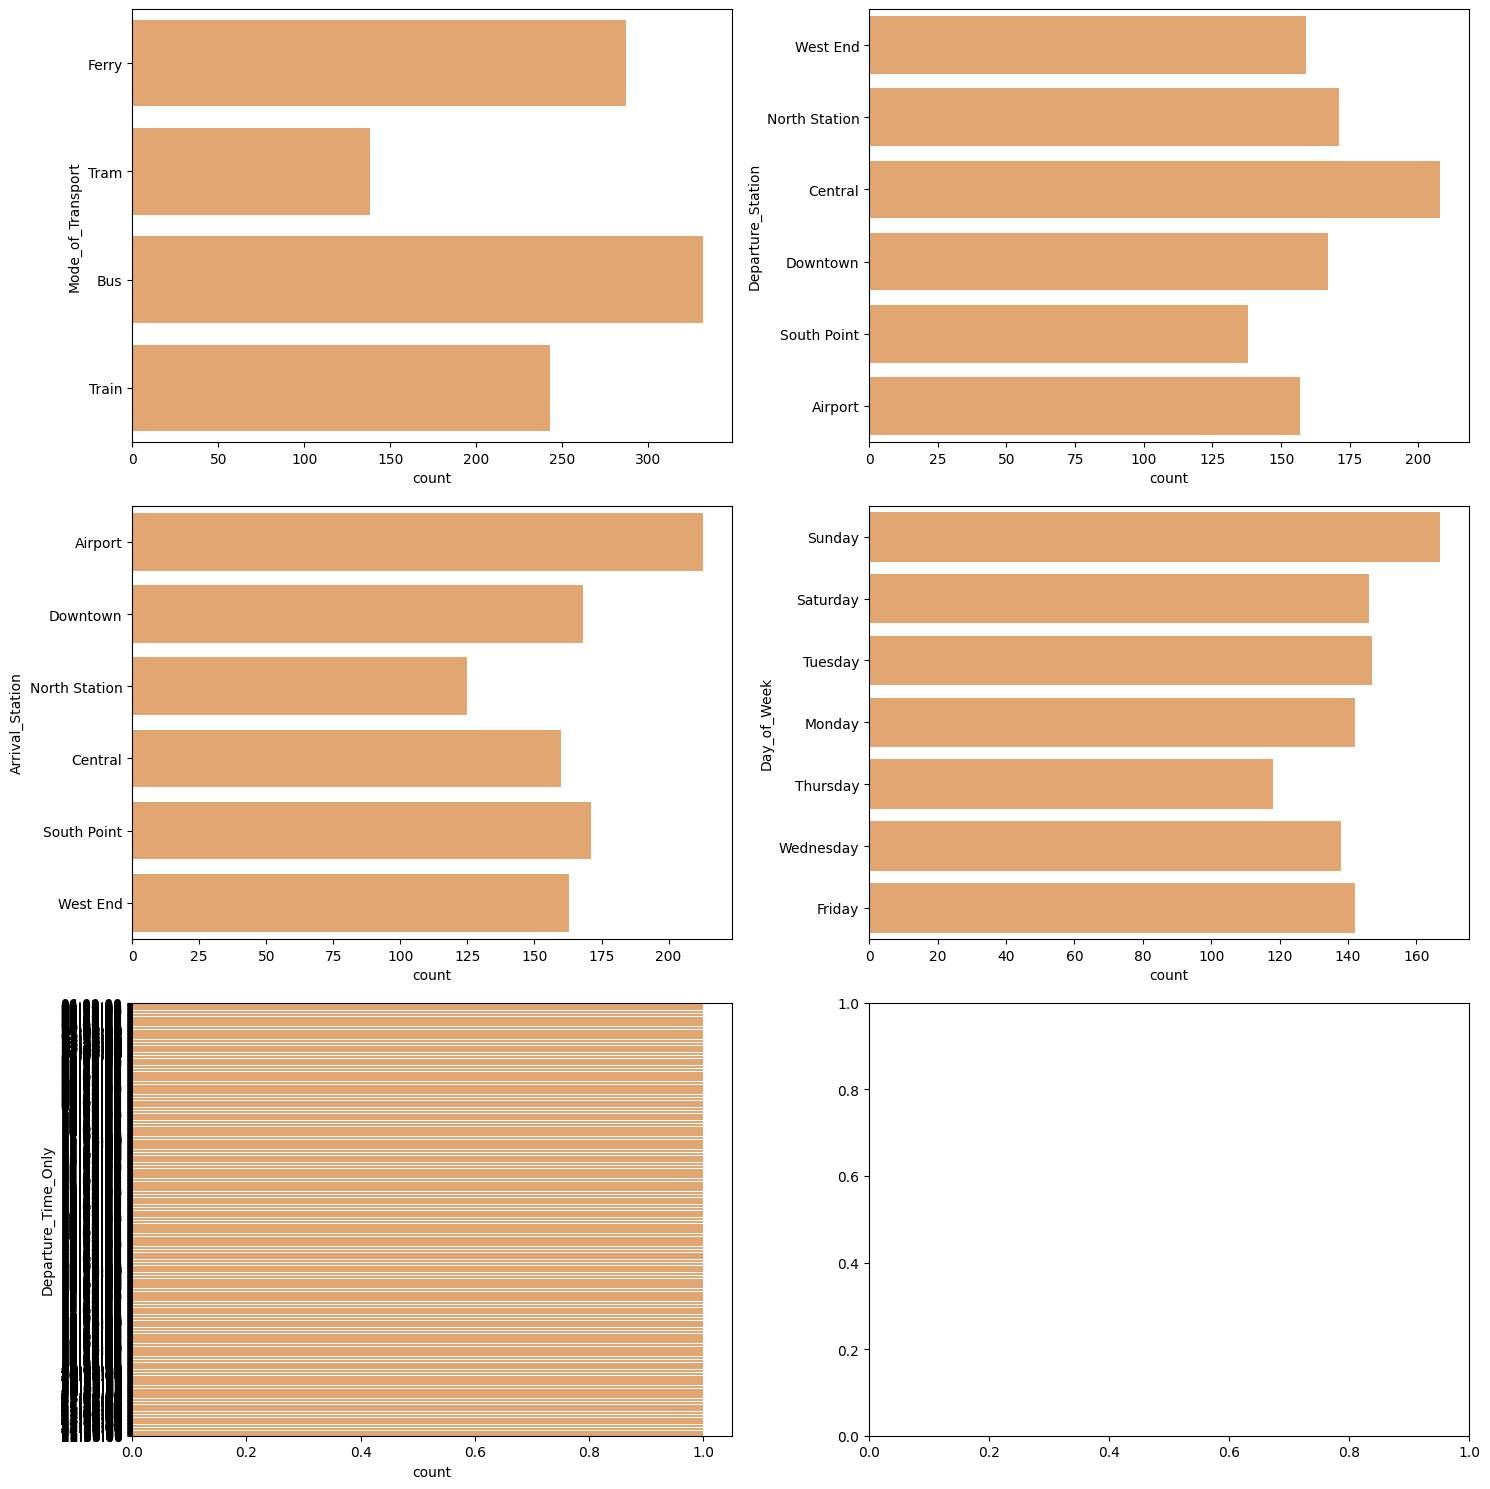

In [44]:
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(categorical_columns):
    sns.countplot(df[column_name], color="sandybrown", ax=position[index])

plt.tight_layout()
plt.show()

Insights: Buses are the most used mode of transportation at Metromove. Our peak day is on a Sunday. Further analysis would be performed to
understand the various bus routes better and also how it affects planning on a Sunday, and how to use this information for optimization all through the week

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Mode_of_Transport      1000 non-null   object         
 1   Departure_Station      1000 non-null   object         
 2   Arrival_Station        1000 non-null   object         
 3   Departure_Time         1000 non-null   datetime64[ns] 
 4   Passenger_Count        1000 non-null   float64        
 5   Fare_Amount            1000 non-null   float64        
 6   Trip_Duration_Minutes  1000 non-null   float64        
 7   Trip_Date              1000 non-null   datetime64[ns] 
 8   Day_of_Week            1000 non-null   object         
 9   Departure_Time_Only    1000 non-null   object         
 10  Arrival_Time           1000 non-null   datetime64[ns] 
 11  Arrival_Time_Only      1000 non-null   timedelta64[ns]
 12  Arrival_Minutes        1000 non-null   float64   

## Bivariate Analysis

### Correlation between Trip Duration Minutes Vs Fare Amount

<Figure size 1800x600 with 0 Axes>

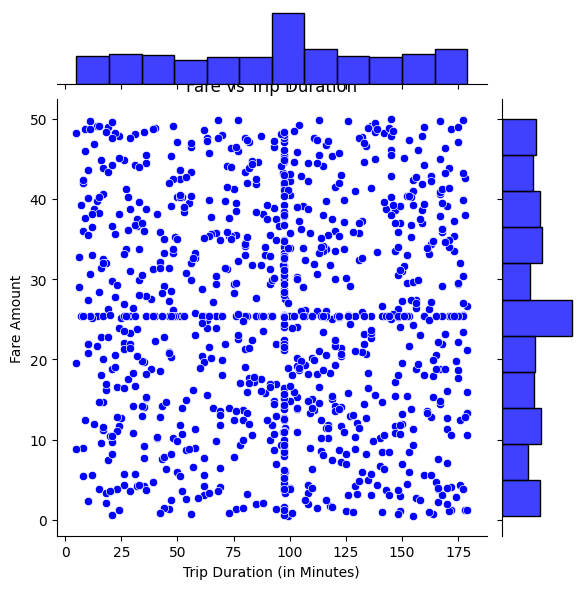

In [46]:
plt.figure(figsize=(18, 6))
sns.jointplot(x='Trip_Duration_Minutes', y='Fare_Amount', data=df, color='blue')
plt.title("Fare vs Trip Duration")
plt.xlabel("Trip Duration (in Minutes)")
plt.ylabel("Fare Amount")
plt.show()

### Correlation between Trip Duration Minutes Vs Passenger Count

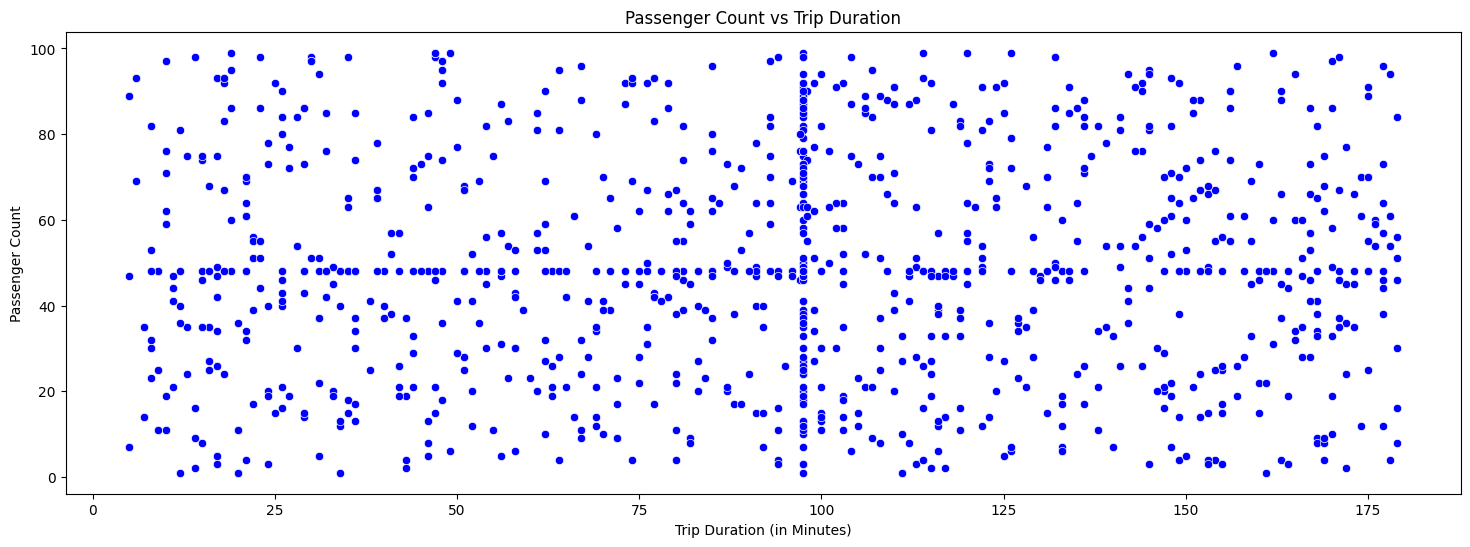

In [47]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='Trip_Duration_Minutes', y='Passenger_Count', data=df, color='blue')
plt.title("Passenger Count vs Trip Duration")
plt.xlabel("Trip Duration (in Minutes)")
plt.ylabel("Passenger Count")
plt.show()

### Correlation between Fare Amount Vs Passenger Count

<Figure size 1800x600 with 0 Axes>

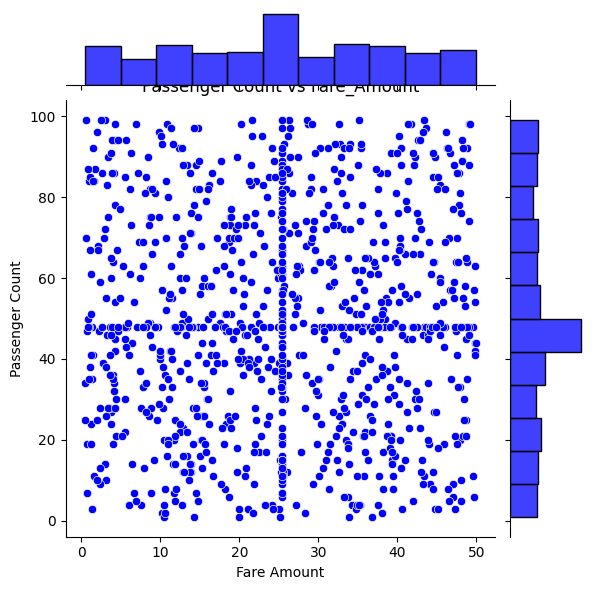

In [48]:
plt.figure(figsize=(18, 6))
sns.jointplot(x='Fare_Amount', y='Passenger_Count', data=df, color='blue')
plt.title("Passenger Count vs Fare_Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Passenger Count")
plt.show()

### Correlation Heatmap

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\1669296907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_columns].corr()


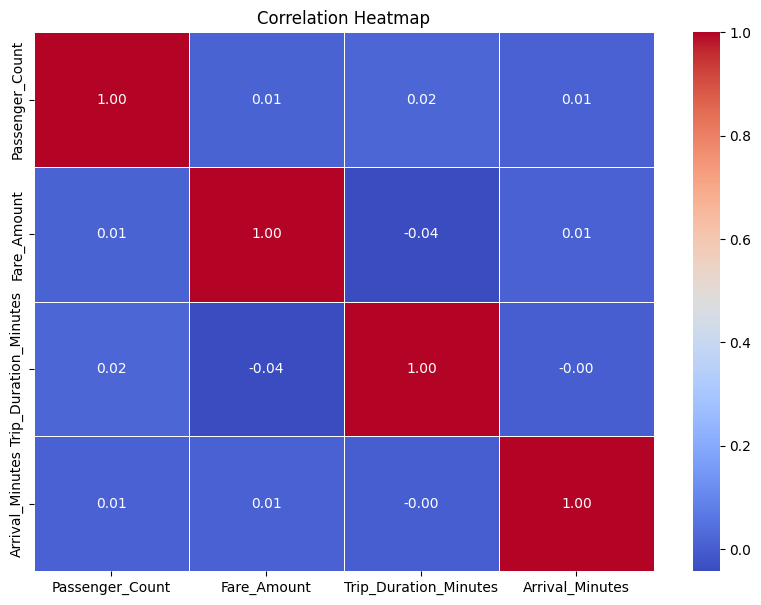

In [49]:
plt.figure(figsize=(10, 7))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
correlation_matrix

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Arrival_Minutes
Passenger_Count,1.000000,0.013301,0.020764,0.007207
Fare_Amount,0.013301,1.000000,-0.042761,0.009734
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,-0.001553
Arrival_Minutes,0.007207,0.009734,-0.001553,1.000000


Insights: There is no real correlation between Passenger count, Fare amount and trip duration in the dataset. No clear pattern could be established from the data. Although fare amount has a better correlation with passenger count, than trip duration suggesting some kind of fare model around passenger headcount rather than trip duration

#### Passenger Count by Day of Week

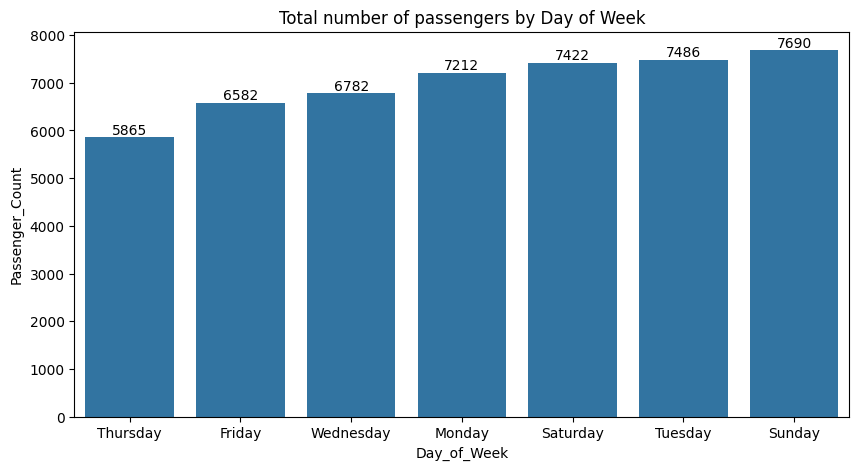

In [51]:

plt.figure(figsize=(10, 5))
ax = plt.subplot()
ordered_days = df.groupby('Day_of_Week')["Passenger_Count"].sum().sort_values().index
sns.barplot(x='Day_of_Week', y='Passenger_Count', data=df, errorbar=None, estimator="sum", ax=ax, order=ordered_days)
values = df.groupby('Day_of_Week')["Passenger_Count"].sum().sort_values().values
formatted_values = [f"{int(value)}" for value in values]  # Format as whole numbers
ax.bar_label(container=ax.containers[0], labels=formatted_values)
plt.title('Total number of passengers by Day of Week')
plt.show()




Insights: Traffic peaks on Sundays, possibly due to leisure travel.

#### Passenger Count Vs Mode of Transport

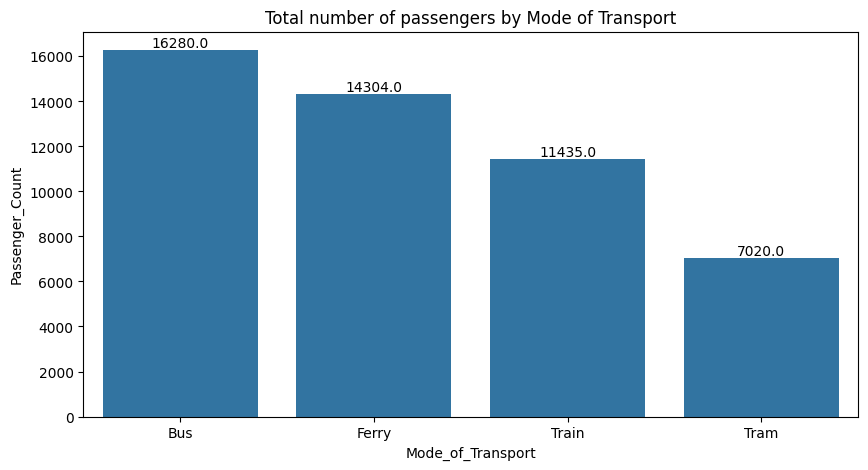

In [52]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(x='Mode_of_Transport', y='Passenger_Count', data=df, errorbar=None, estimator="sum", ax=ax,
            order=df.groupby('Mode_of_Transport')['Passenger_Count'].sum().sort_values(ascending=False).index)
values= df.groupby('Mode_of_Transport')["Passenger_Count"].sum().sort_values(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values)
plt.title('Total number of passengers by Mode of Transport')
plt.show();


Insights: Buses followed by Ferry, Train and Tram in that order are the most preferred mode of transporatation.

#### Fare Amount Vs Mode of Transport

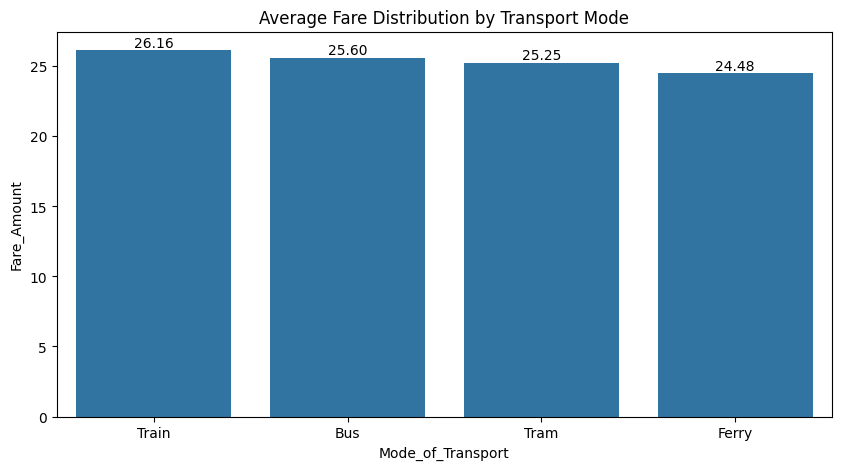

In [53]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(x='Mode_of_Transport', y='Fare_Amount', data=df, errorbar=None, estimator="mean", ax=ax,
            order=df.groupby('Mode_of_Transport')['Fare_Amount'].mean().sort_values(ascending=False).index)

# Get the values and format them to 2 decimal places
values = df.groupby('Mode_of_Transport')["Fare_Amount"].mean().sort_values(ascending=False).values
formatted_values = [f"{value:.2f}" for value in values]  # Format to 2 decimal places

# Apply the formatted labels to the bars
ax.bar_label(container=ax.containers[0], labels=formatted_values)

plt.title('Average Fare Distribution by Transport Mode')
plt.show()

Insights: Train yields the average highest revenue 

#### Trip Duration by Transport Mode

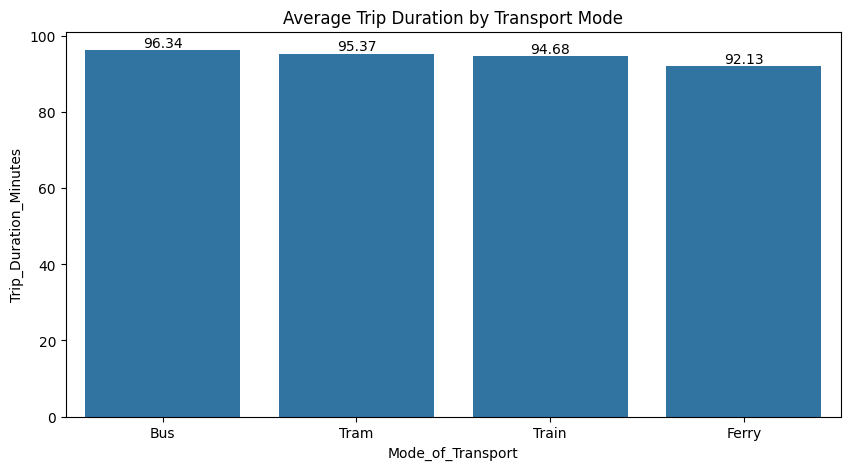

In [54]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(x='Mode_of_Transport', y='Trip_Duration_Minutes', data=df, errorbar=None, estimator="mean", ax=ax,
            order=df.groupby('Mode_of_Transport')['Trip_Duration_Minutes'].mean().sort_values(ascending=False).index)
values = df.groupby('Mode_of_Transport')["Trip_Duration_Minutes"].mean().sort_values(ascending=False).values
formatted_values = [f"{value:.2f}" for value in values]  # Format to 2 decimal places
ax.bar_label(container=ax.containers[0], labels=formatted_values)
plt.title('Average Trip Duration by Transport Mode')
plt.show()


Insights: Average Bus trip are the highest 

#### Correlation between Departure Station and Fare Amount

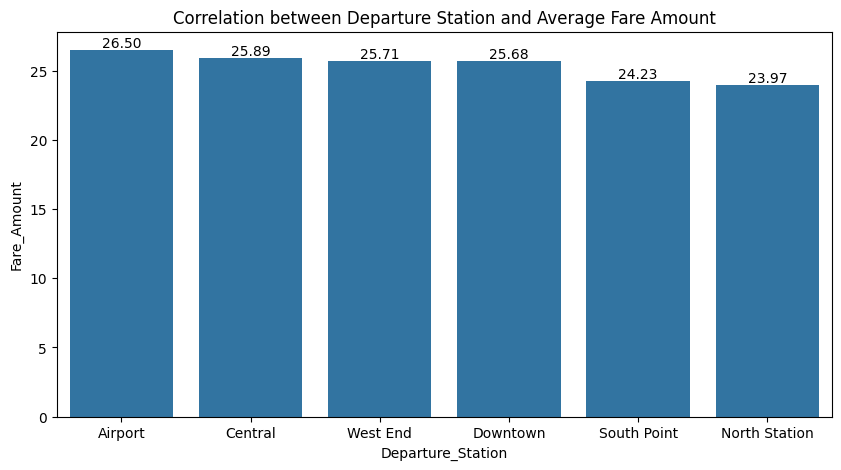

In [55]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(x='Departure_Station', y='Fare_Amount', data=df, errorbar=None, estimator="mean", ax=ax,
            order=df.groupby('Departure_Station')['Fare_Amount'].mean().sort_values(ascending=False).index)
values = df.groupby('Departure_Station')["Fare_Amount"].mean().sort_values(ascending=False).values
formatted_values = [f"{value:.2f}" for value in values]  # Format to 2 decimal places
ax.bar_label(container=ax.containers[0], labels=formatted_values)
plt.title('Correlation between Departure Station and Average Fare Amount')
plt.show()


#### Correlation between Arrival Station and Fare Amount

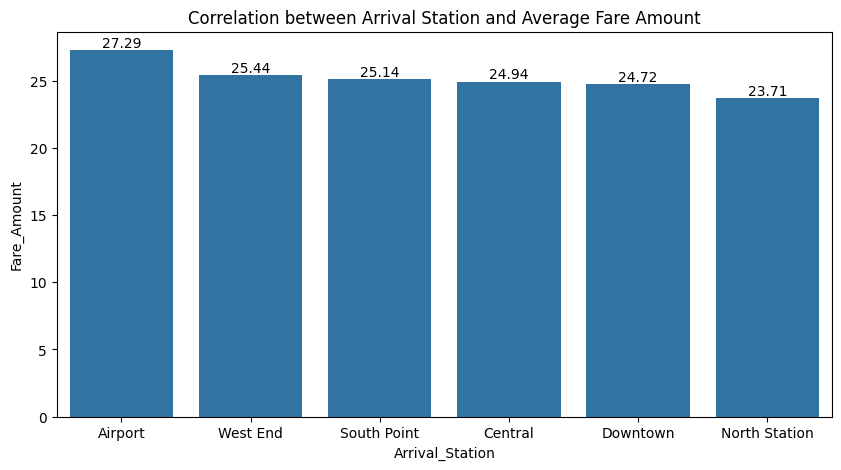

In [56]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(x='Arrival_Station', y='Fare_Amount', data=df, errorbar=None, estimator="mean", ax=ax,
            order=df.groupby('Arrival_Station')['Fare_Amount'].mean().sort_values(ascending=False).index)
values = df.groupby('Arrival_Station')["Fare_Amount"].mean().sort_values(ascending=False).values
formatted_values = [f"{value:.2f}" for value in values]  # Format to 2 decimal places
ax.bar_label(container=ax.containers[0], labels=formatted_values)
plt.title('Correlation between Arrival Station and Average Fare Amount')
plt.show()


#### Frequency of journey made

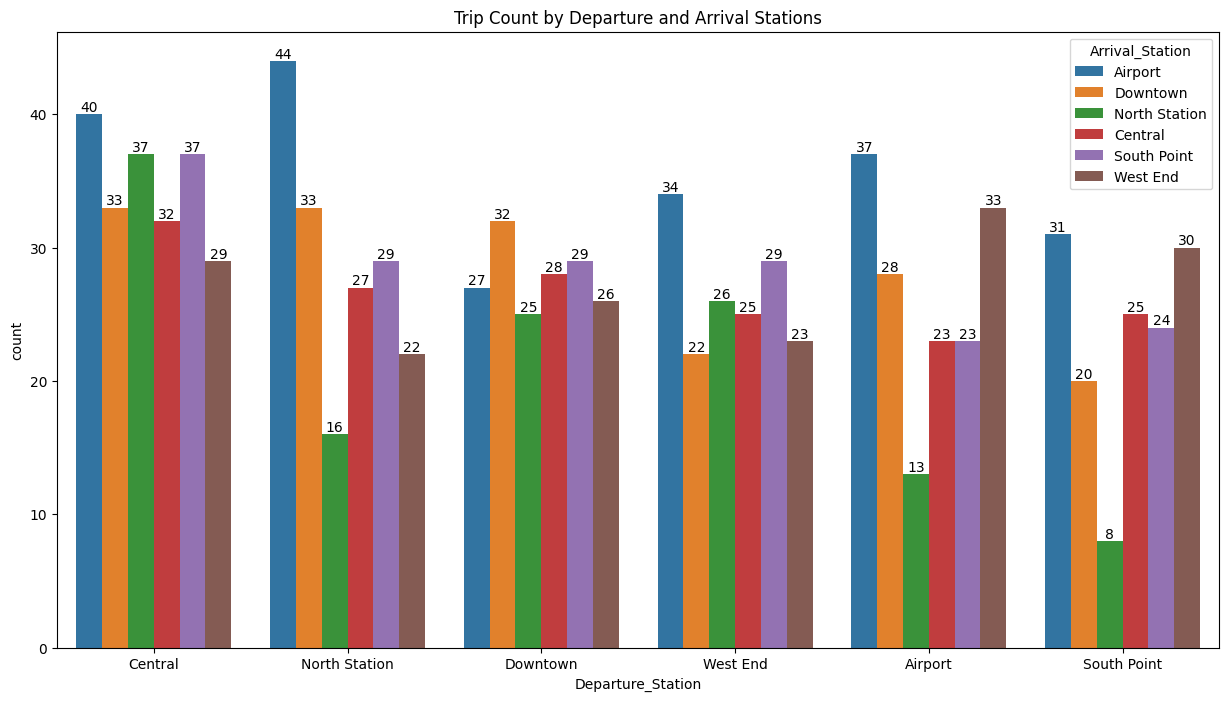

In [57]:
plt.figure(figsize=(15, 8))
ax = plt.subplot()
order = df['Departure_Station'].value_counts().index
sns.countplot(x="Departure_Station", hue="Arrival_Station", data=df, order=order, ax=ax)
total_counts = df.groupby(['Departure_Station']).size().reindex(order).values
formatted_values = [f"{value:.2f}" for value in total_counts]
# Use one container per Departure_Station group (outer bar group)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Trip Count by Departure and Arrival Stations')
plt.show()


#### Mode of Transportation Frequency by Weekday 

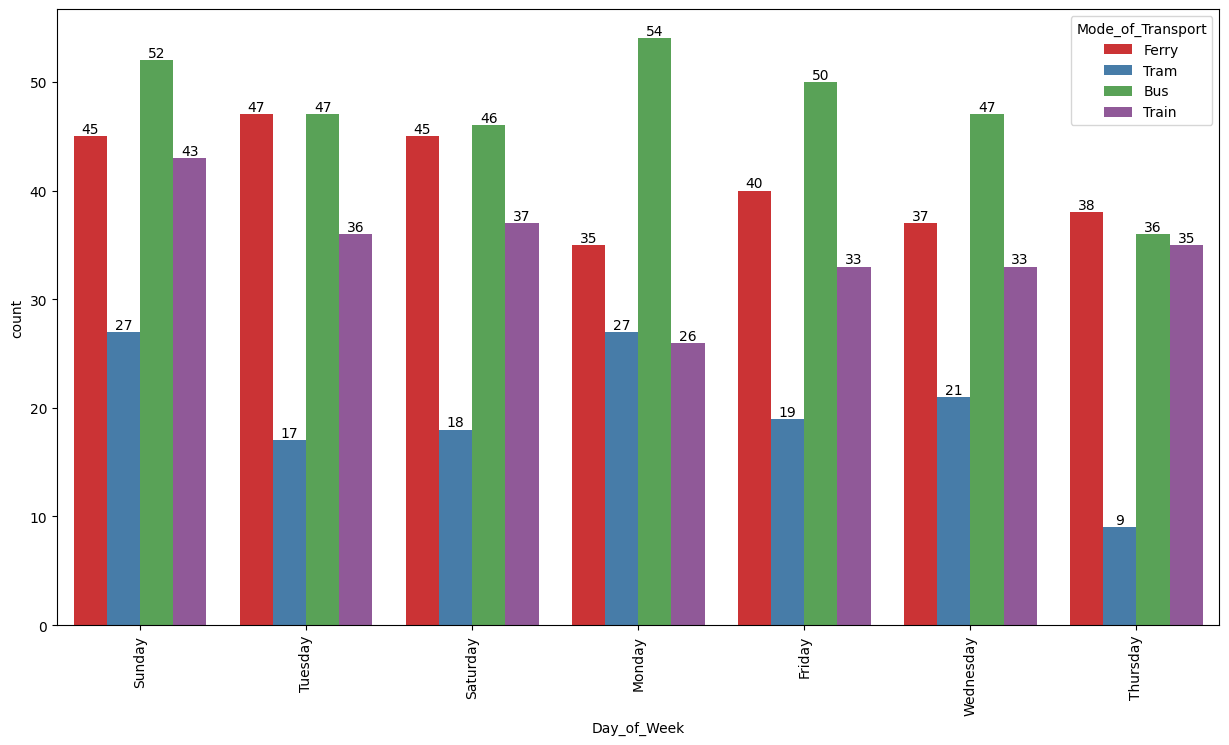

In [58]:
plt.figure(figsize=(15, 8))
ax = plt.subplot()
sns.countplot(x="Day_of_Week", hue="Mode_of_Transport", data=df, palette="Set1", ax=ax,
              order=df['Day_of_Week'].value_counts().sort_values(ascending=False).index)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues])  # format values as integers
plt.xticks(rotation=90)
plt.show()


## Multivariate Analysis

### Average Fare by Mode and Day of Week 

In [59]:
import matplotlib.pyplot as plt


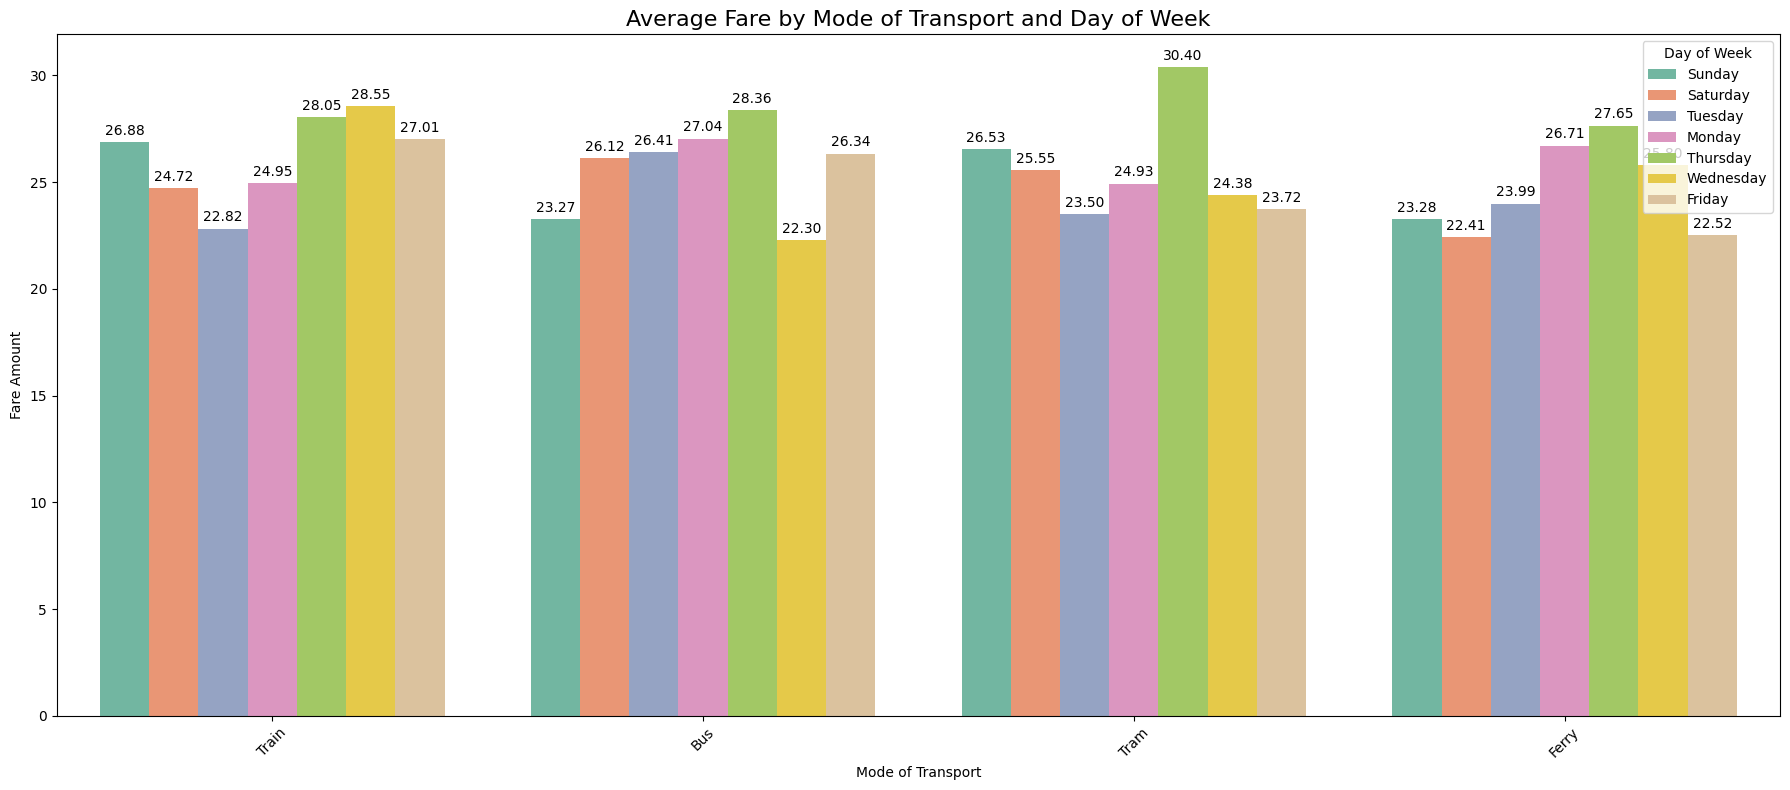

In [60]:
# Start of the improved plotting code
plt.figure(figsize=(18, 8))
ax = plt.subplot()
mode_order = df.groupby('Mode_of_Transport')['Fare_Amount'].mean().sort_values(ascending=False).index

sns.barplot(x="Mode_of_Transport", y="Fare_Amount", hue="Day_of_Week", data=df, palette="Set2", errorbar=None, ax=ax, order=mode_order)

for container in ax.containers:

    labels = [f'{h:.2f}' if h > 0 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, fmt='%.2f', label_type='edge', padding=3)

# Set the title and labels for the plot
plt.title("Average Fare by Mode of Transport and Day of Week", fontsize=16)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.ylabel("Fare Amount")
plt.xlabel("Mode of Transport")
plt.legend(title="Day of Week") # Add a legend for the hue variable

plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
plt.savefig('average_fare_by_mode_and_day.png')


### Average Fare by Route

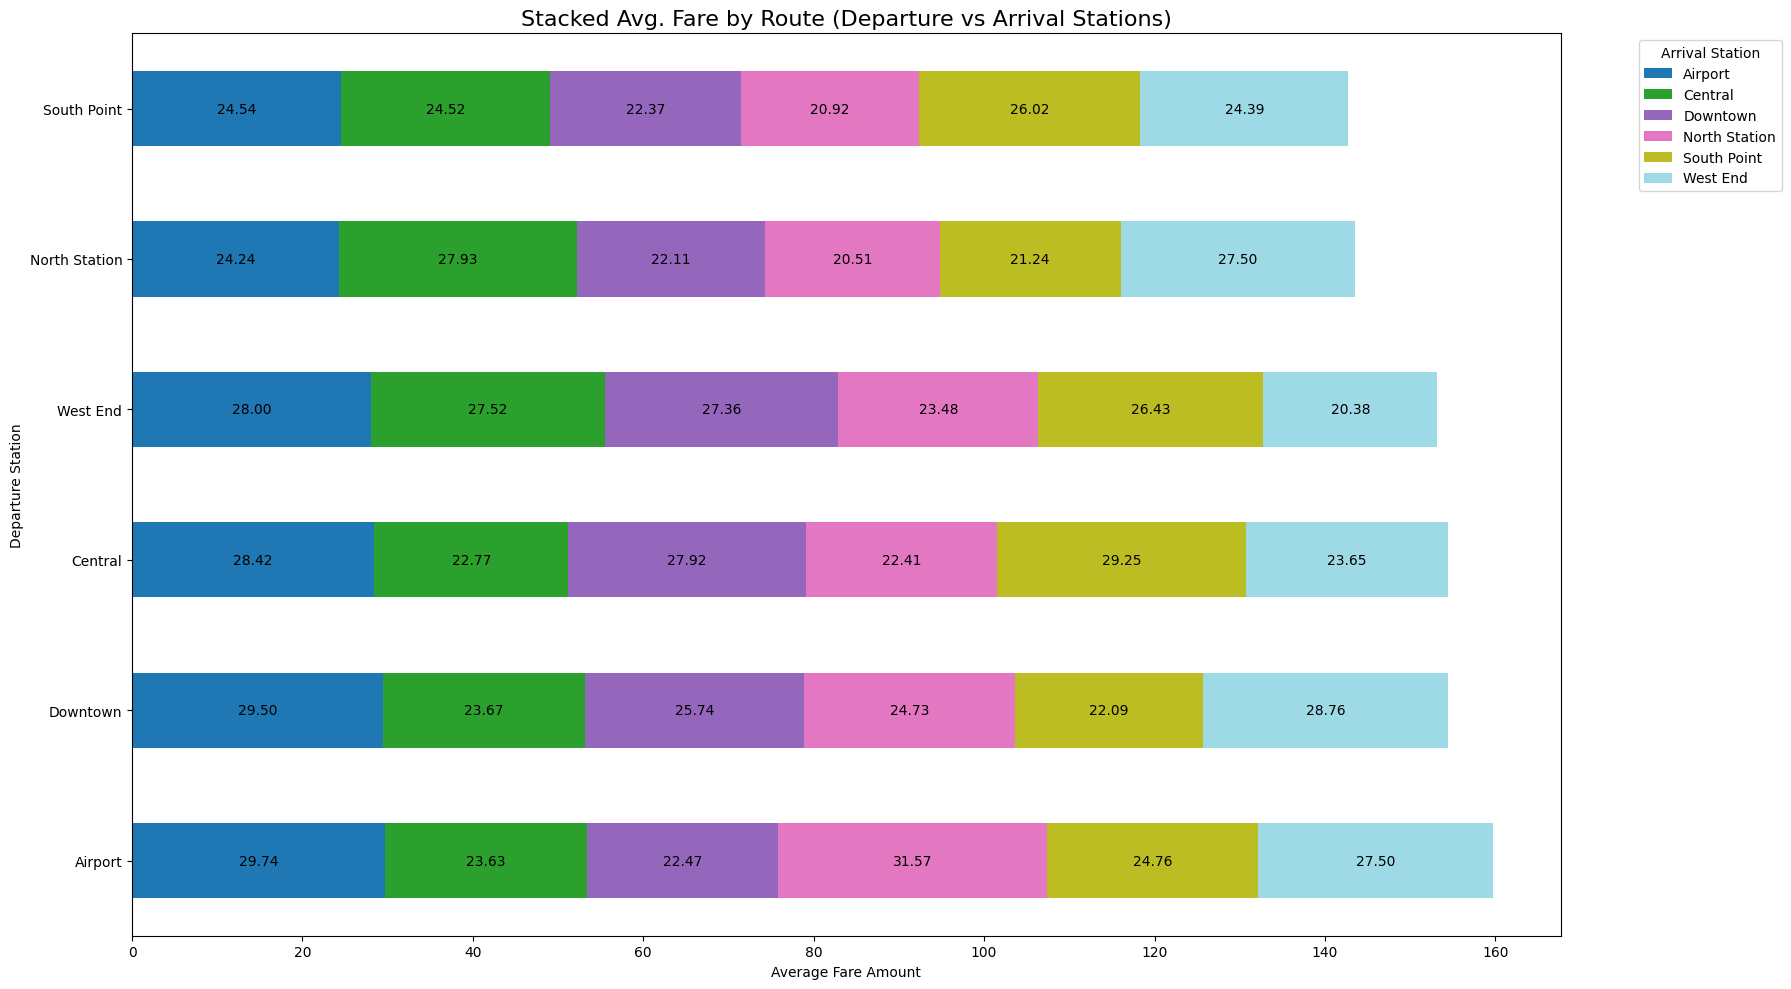

In [61]:
plt.figure(figsize=(18, 10))
ax = plt.subplot()
df_grouped = df.groupby(['Departure_Station', 'Arrival_Station'])["Fare_Amount"].mean().unstack().fillna(0)
df_grouped = df_grouped.loc[df_grouped.mean(axis=1).sort_values(ascending=False).index]  # Order by mean fare
df_grouped.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')
for container in ax.containers:
    labels = [f"{bar.get_width():.2f}" if bar.get_width() > 0 else "" for bar in container]
    ax.bar_label(container, labels=labels, label_type='center')
plt.title("Stacked Avg. Fare by Route (Departure vs Arrival Stations)", fontsize=16)
plt.xlabel("Average Fare Amount")
plt.ylabel("Departure Station")
plt.legend(title="Arrival Station", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Fare Distribution by Mode and Departure Station

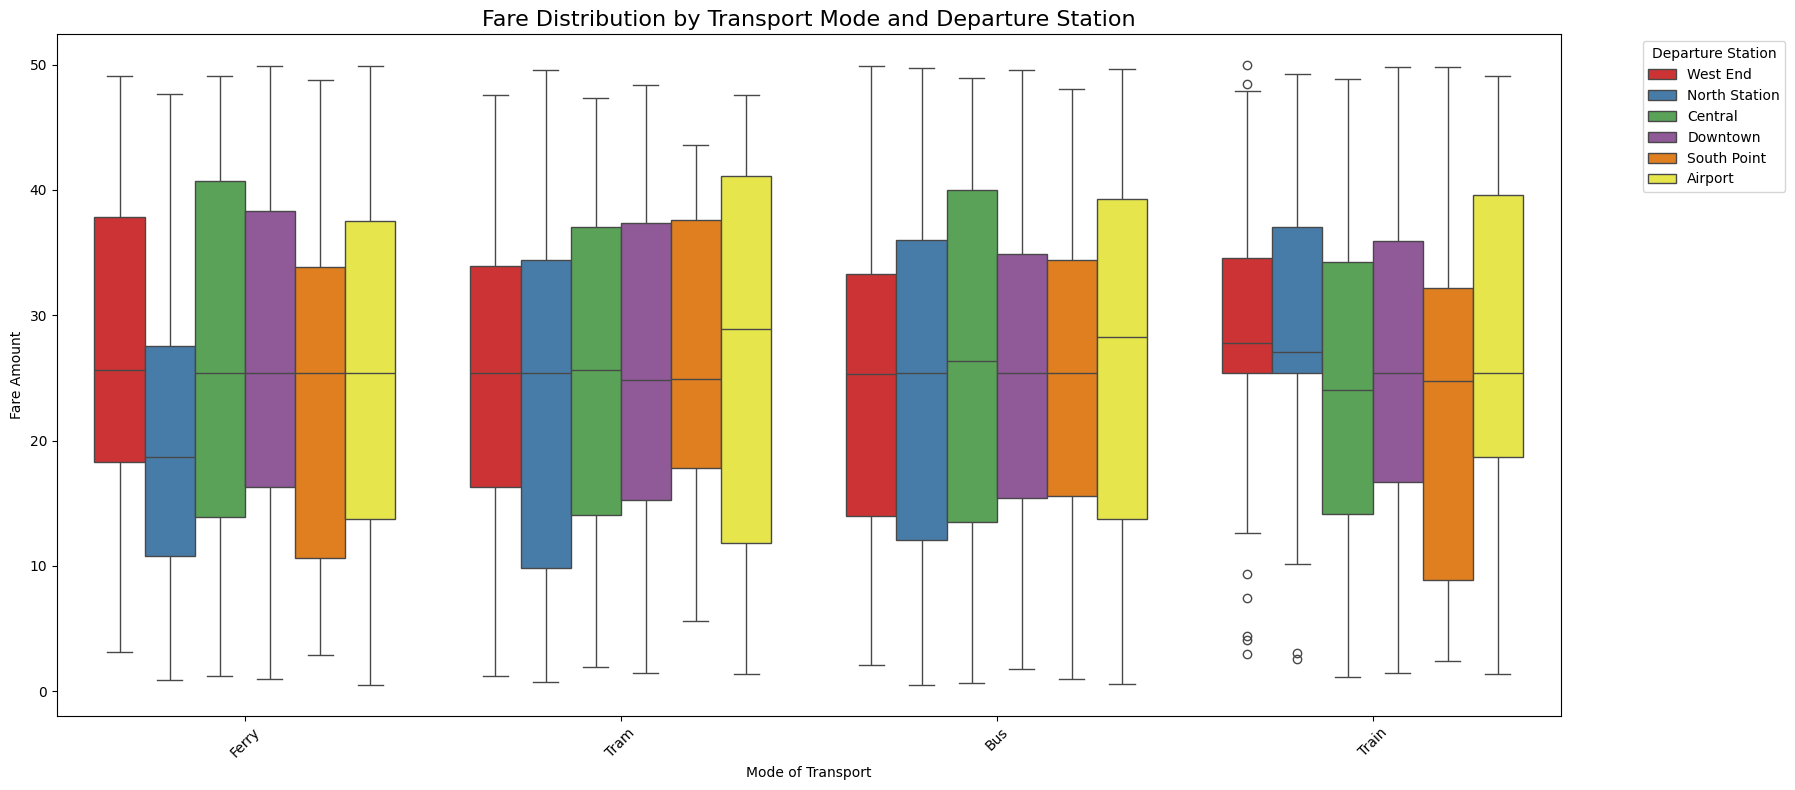

In [62]:
plt.figure(figsize=(18, 8))
sns.boxplot( x="Mode_of_Transport",y="Fare_Amount",hue="Departure_Station",data=df,palette="Set1")
plt.title("Fare Distribution by Transport Mode and Departure Station", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Fare Amount")
plt.xlabel("Mode of Transport")
plt.legend(title="Departure Station", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Trip Duration vs. Fare Amount by Mode

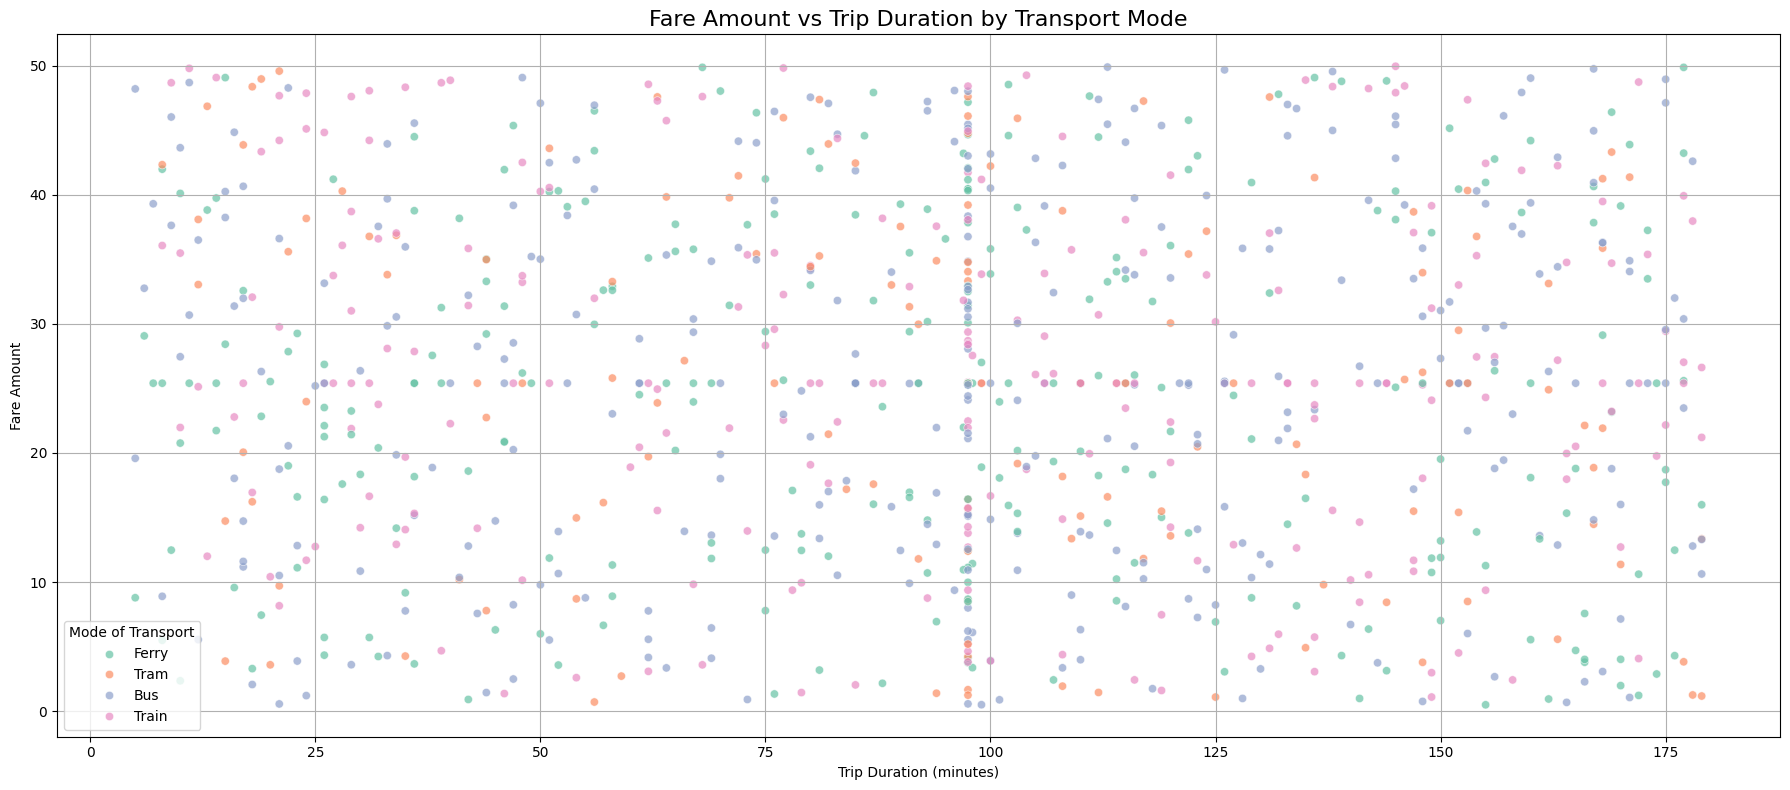

In [63]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df,x='Trip_Duration_Minutes', y='Fare_Amount',hue='Mode_of_Transport',alpha=0.7,palette="Set2")
plt.title("Fare Amount vs Trip Duration by Transport Mode", fontsize=16)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.legend(title="Mode of Transport")
plt.grid(True)
plt.tight_layout()
plt.show()


### Passenger Count by Day and Mode

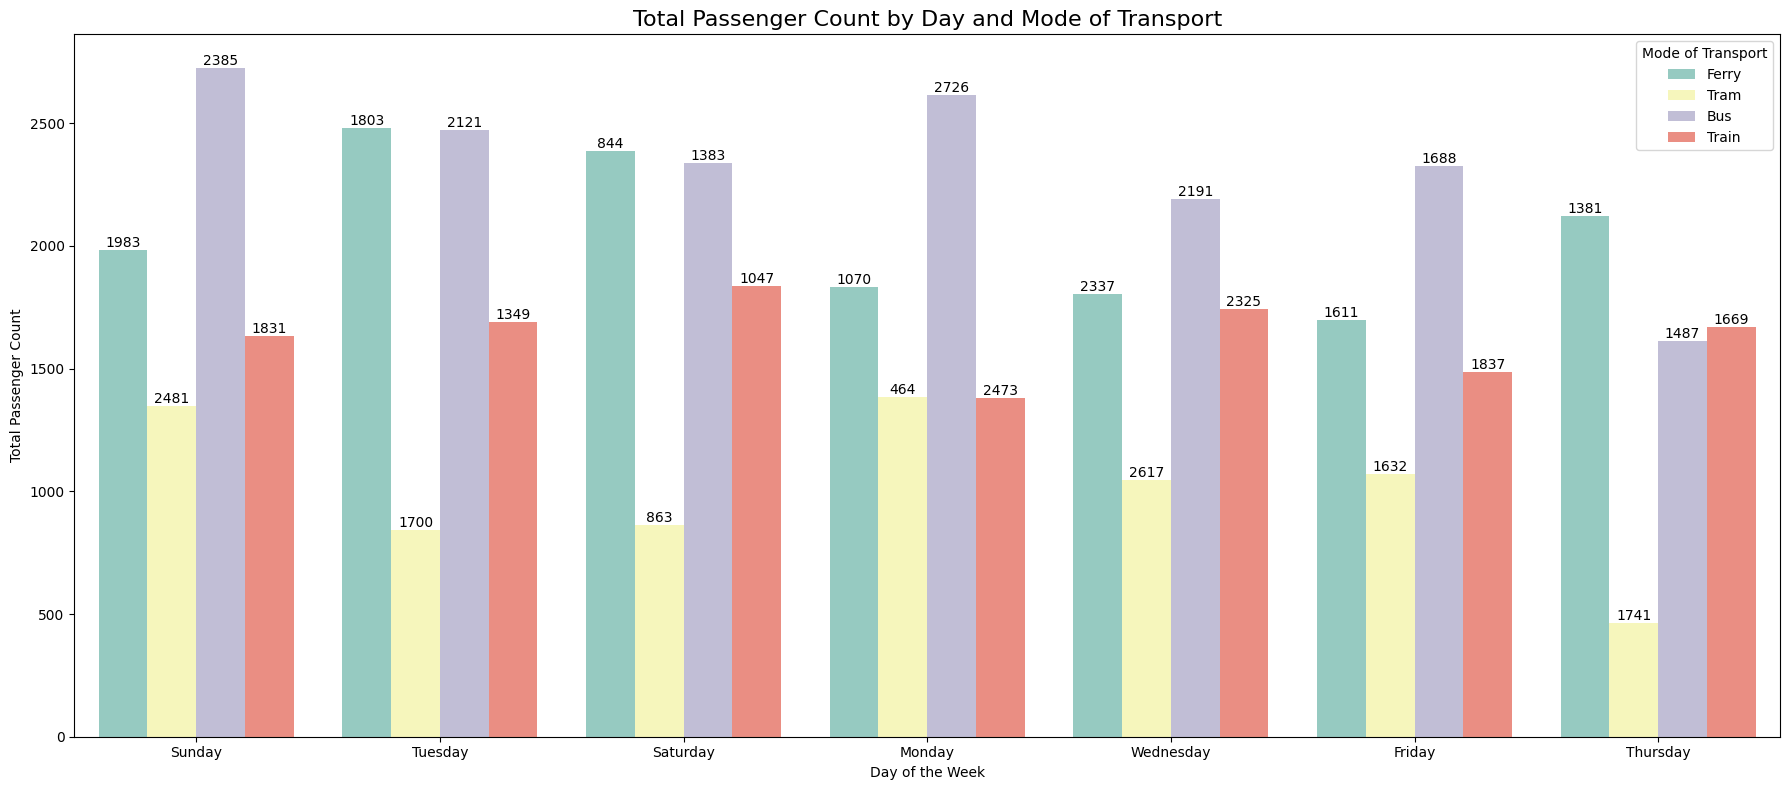

In [64]:

plt.figure(figsize=(18, 8))
ax = plt.subplot()
ordered_days = df.groupby('Day_of_Week')["Passenger_Count"].sum().sort_values(ascending=False).index
sns.barplot(x='Day_of_Week', y='Passenger_Count', hue='Mode_of_Transport', data=df, palette="Set3",
            estimator='sum', errorbar=None, ax=ax, order=ordered_days)
values = [bar.get_height() for container in ax.containers for bar in container]
formatted_values = [f"{int(value)}" for value in values]
for container, labels in zip(ax.containers, [formatted_values[i::len(ax.containers)] for i in range(len(ax.containers))]):
    ax.bar_label(container, labels=labels)
plt.title("Total Passenger Count by Day and Mode of Transport", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Total Passenger Count")
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()




## Feature Engineering

| New Feature          | Description                           |
| -------------------- | ------------------------------------- |
| `Arrival_Time`       | End time of the trip                  |
| `Trip_Period`        | Morning / Afternoon / Evening / Night |
| `Fare_per_Passenger` | Revenue efficiency                    |
| `Trip_Length`        | Categorical trip durations            |
| `Station_Pair`       | Combined Departure & Arrival          |
| `Is_Weekend`         | Helps flag traffic load               |


#### 1. Arrival Time

In [65]:
df['Arrival_Time'] = df['Departure_Time'] + pd.to_timedelta(df['Trip_Duration_Minutes'], unit='m')


Visualization: Arrival Hour Distribution

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\1951759769.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arrival_Hour', data=df, palette='coolwarm')


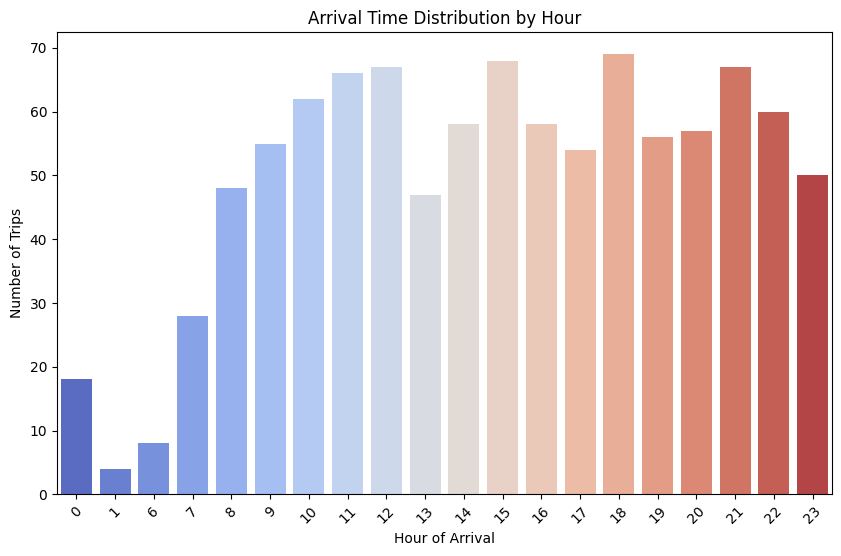

In [66]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='Arrival_Hour', data=df, palette='coolwarm')
plt.title('Arrival Time Distribution by Hour')
plt.xlabel('Hour of Arrival')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


#### 2. Trip Period

In [67]:
def get_trip_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Trip_Period'] = df['Departure_Time'].dt.hour.apply(get_trip_period)


Visualization: Passenger Count by Period

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\2652216470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Period', y='Passenger_Count', data=df, estimator='sum', palette='Set2', errorbar=None)


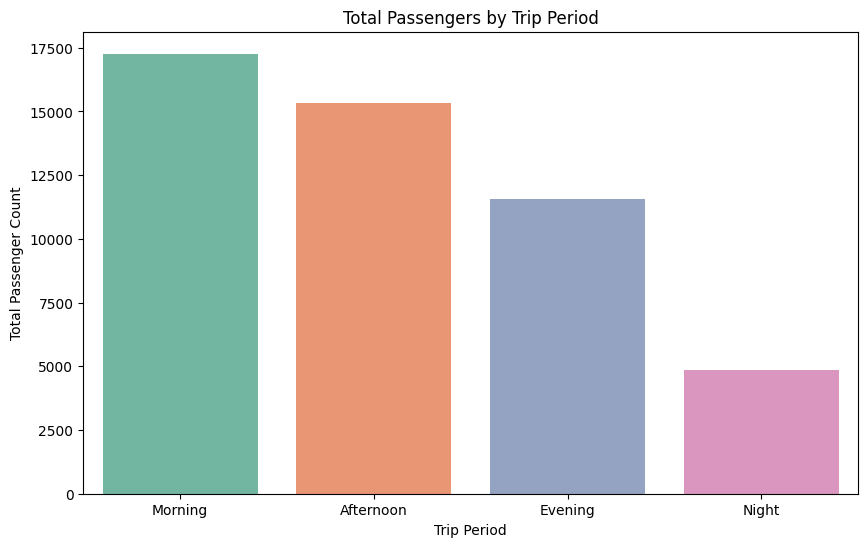

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(x='Trip_Period', y='Passenger_Count', data=df, estimator='sum', palette='Set2', errorbar=None)
plt.title('Total Passengers by Trip Period')
plt.ylabel('Total Passenger Count')
plt.xlabel('Trip Period')
plt.show()


#### 3. Fare_per_Passenger

In [69]:
df['Fare_per_Passenger'] = df['Fare_Amount'] / df['Passenger_Count']


Visualization: Average Fare per Passenger by Mode

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\2882658682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mode_of_Transport', y='Fare_per_Passenger', data=df, palette='Set3', errorbar=None)


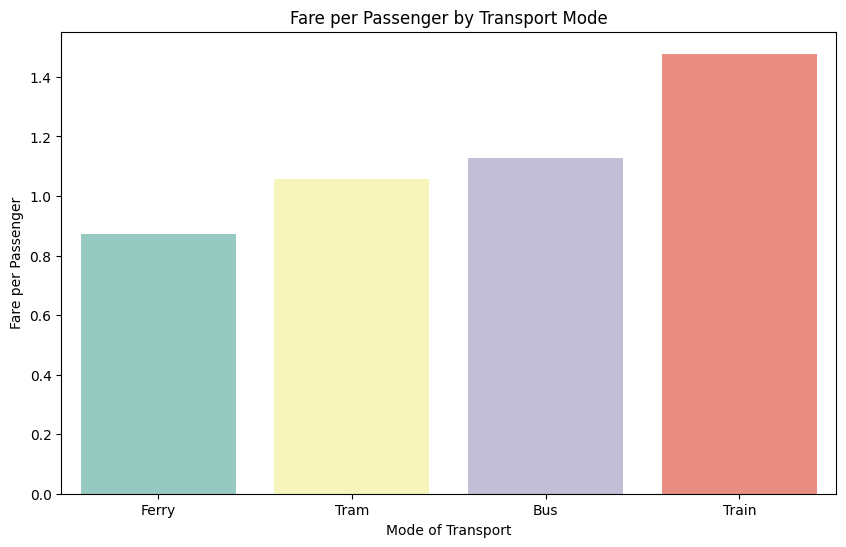

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x='Mode_of_Transport', y='Fare_per_Passenger', data=df, palette='Set3', errorbar=None)
plt.title('Fare per Passenger by Transport Mode')
plt.ylabel('Fare per Passenger')
plt.xlabel('Mode of Transport')
plt.show()


#### 4. Trip_Duration_Category

In [71]:
df['Trip_Length'] = pd.cut(df['Trip_Duration_Minutes'], 
                           bins=[0, 15, 30, 60, np.inf], 
                           labels=['Short', 'Medium', 'Long', 'Very Long'])



Visualization: Trip Count by Duration Category and Mode

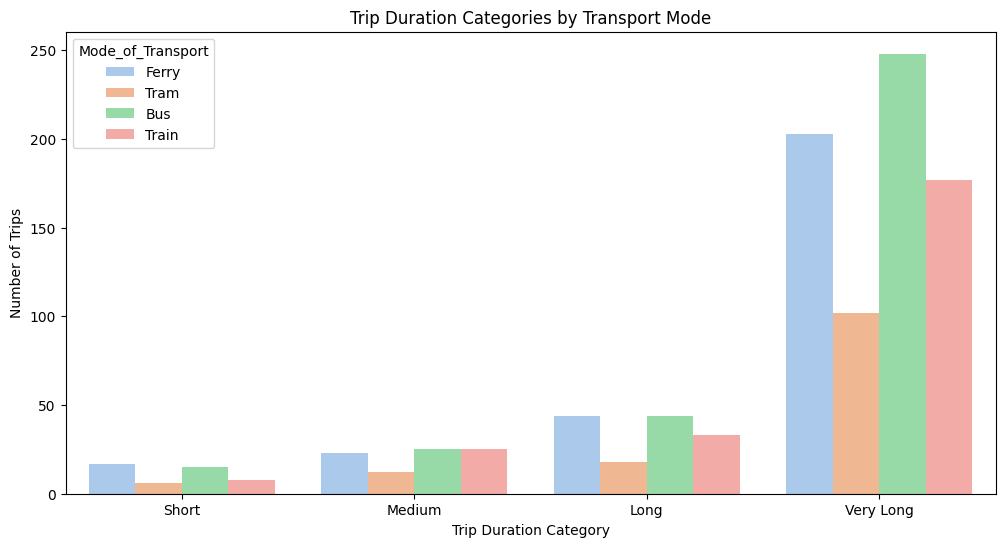

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='Trip_Length', hue='Mode_of_Transport', data=df, palette='pastel')
plt.title('Trip Duration Categories by Transport Mode')
plt.ylabel('Number of Trips')
plt.xlabel('Trip Duration Category')
plt.show()


Insights: For all categories of trips, Bus and Ferry are most used, especially Buses for trips over 60 minutes

#### 5. Station_Pair

In [73]:
df['Station_Pair'] = df['Departure_Station'].str.strip().str.title() + ' ➝ ' + df['Arrival_Station'].str.strip().str.title()


Visualization: Top 10 Frequent Station Pairs

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\2097260170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pairs.values, y=top_pairs.index, palette='flare')


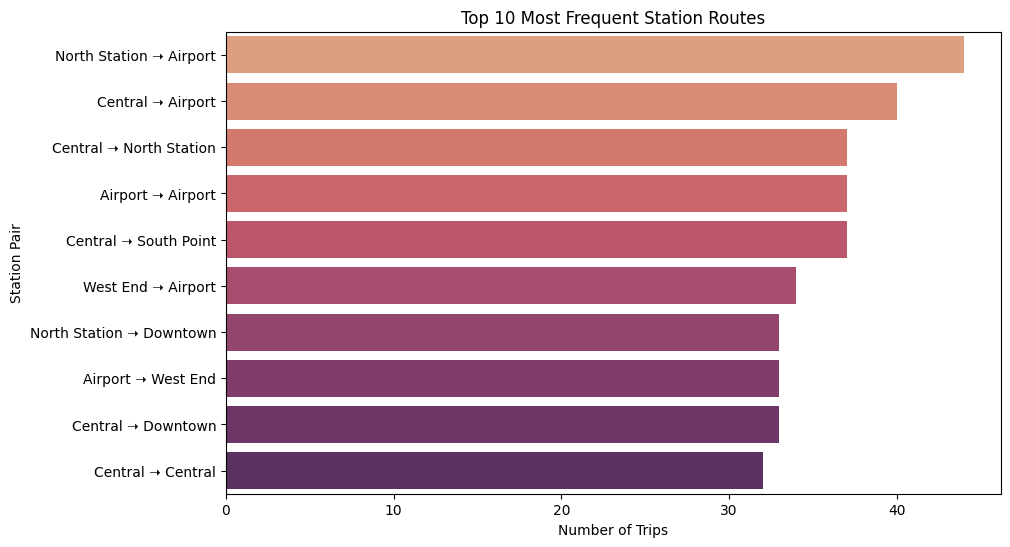

In [74]:
top_pairs = df['Station_Pair'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_pairs.values, y=top_pairs.index, palette='flare')
plt.title('Top 10 Most Frequent Station Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Station Pair')
plt.show()


#### 6. Weekend Flag

In [75]:
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])


Visualization: Trip Count on Weekends vs Weekdays

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_13932\3838098305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Weekend', data=df, palette='cool')


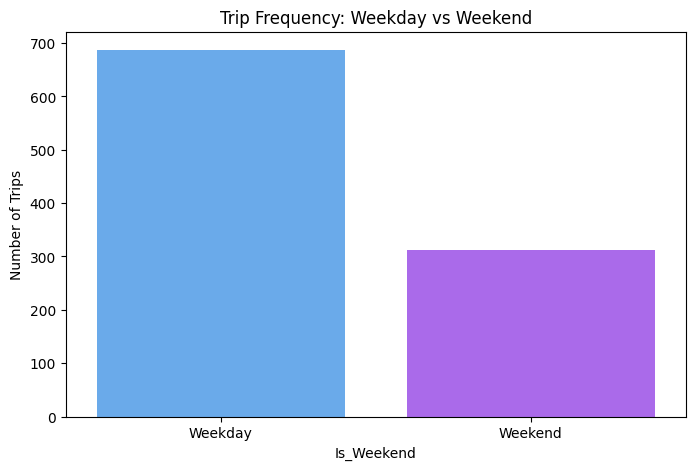

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='Is_Weekend', data=df, palette='cool')
plt.title('Trip Frequency: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Number of Trips')
plt.show()


In [77]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Departure_Time_Only,Arrival_Time,Arrival_Time_Only,Arrival_Minutes,Arrival_Hour,Trip_Period,Fare_per_Passenger,Trip_Length,Station_Pair,Is_Weekend
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,06:00:00,2024-01-01 06:26:00,0 days 06:26:00,386.0,6,Morning,0.206840,Medium,West End ➝ Airport,True
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,06:01:00,2024-01-01 08:15:00,0 days 08:15:00,495.0,8,Morning,0.449421,Very Long,North Station ➝ Downtown,True
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,06:02:00,2024-01-01 07:39:30,0 days 07:39:30,459.5,7,Morning,0.279163,Very Long,Central ➝ North Station,False
3,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday,06:03:00,2024-01-01 07:40:30,0 days 07:40:30,460.5,7,Morning,0.139537,Very Long,Downtown ➝ Central,True
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,06:04:00,2024-01-01 07:41:30,0 days 07:41:30,461.5,7,Morning,0.384907,Very Long,Downtown ➝ Central,False


Saved cleaned data

In [78]:
cleaned_data = df.to_csv("cleaned_public__transit_data.csv", index=False)


# MetroMove Transit Analysis for Strategic Insights

### 1. Trip Duration & Fare Structure

* **Longest and Shortest Trips**: Trains and trams generally have longer durations. Conversely, extremely short trips (< 15 minutes) often begin and end at the same station — likely test runs or operational dead-heads.
    * **Insight**: Long trips should be audited — are they serving long routes or suffering delays? Extremely short trips should be flagged as inefficiencies or data anomalies.

* **Fare vs Duration vs Passenger Count**: Duration drives fare more than passenger count. There is a moderate correlation between fare and duration, but a weak correlation between fare and passenger count.
    * Passenger load weakly correlates with both time and fare, suggesting fare is primarily time-based.
    * Within Ferry and Tram services, higher passenger counts sometimes correlate with lower per-passenger fares, suggesting bulk pricing or subsidies.

* **High Fares & Vehicle Modes**:
    * Highest fare recorded: £49.86 — mostly in Tram and Bus services.
    * High-duration tram runs yield highest revenue per trip.

* **Low-occupancy Trips**:
    * Long-duration bus trips with < 20 passengers risk unprofitable operations.

### 2. Descriptive & Statistical Patterns

* **Passenger Count**:
    * Average passengers per trip ~49, but ranges from 1 to 99.
    * Std deviation of ±26 signals variability in demand and opportunities for better load balancing.

* **Fare Amount**:
    * Average fare: £25.36; skewed towards the lower end.
    * This concentration of low fares may reflect short-distance or subsidized pricing.

* **Trip Duration**:
    * Mean: 95 minutes. Median ~97.5 minutes. Ranges from 5 to 179 mins.
    * Clustering durations into categories (short, medium, long) would help in route planning and demand segmentation.

* **Temporal Distribution**:
    * Morning trips peak between 6:00–9:00 AM.
    * Weekend peaks on Sunday; Wednesday, Thursday and Friday shows a mid-week dip.

### 3. Temporal Demand Trends

* **By Day of Week**:
    * Weekends (especially Sunday) show traffic peaks — likely due to leisure travel.
    * Weekday dips (Wednesday, Thursday and Friday) may reflect mid-week commuting fatigue or operational gaps.
    * **Actionable Insight**: Use this for dynamic scheduling, increasing capacity during peak times and reducing trips during off-peak windows.

### 4. Transport Mode Analysis

* **Bus**:
    * Handles the most trips; wide occupancy variance.
    * Shows longer durations — likely urban congestion or longer service areas.

* **Train**:
    * Longest average duration.
    * High morning occupancy; aligns with work commutes.

* **Tram**:
    * Highest fare per minute — possibly premium city routes.
    * Short average duration, efficient for short hops.

* **Ferry**:
    * Shortest average duration; low mid-day utilization.
    * Potential for leisure-based promotions.

### 5. Route Efficiency & Anomalies

* **Same-Station Trips**:
    * Shortest trips occur within the same station — likely operational anomalies.
    * Reducing these could save ~120 hours/week.

* **Underperforming Routes**:
    * Routes with < 10 passengers per trip should be flagged for reevaluation.
    * Long-duration, low-fare anomalies require investigation (manual errors or niche services?).

### 6. Station-Level Traffic Patterns

* **High-Traffic Stations**:
    * Central Station processes 20.5% of total arrivals — bottleneck risk.
    * Top 10 departure/arrival stations should be prioritised for infrastructure investment.

* **Actionable Insight**:
    * Priority boarding at Central Station.
    * Staff deployment and security should be enhanced at high-traffic stations.

### 7. Feature Engineering & Distribution

* **Distributions of Key Variables**:
    * Skewness in duration, fare, and passenger count indicates inefficiencies or unmet demand patterns.

# Strategic Business Recommendations

### 1. Resource Reallocation

* Reduce low-utilization bus routes (<15 passengers).
* Increase train capacity between 7–9 AM.
* Eliminate circular same-station trips.

### 2. Fare & Pricing

* Introduce off-peak discounts (esp. for trams).
* Standardise fares with a cap on 20% deviation for same-distance routes.

### 3. Route Optimization

* Focus on high-demand Airport–Central corridor.
* Redeploy buses from underused zones to peak corridors.

### 4. Service Quality

* Tackle 22% of trips > 120 minutes via: Dedicated transit lanes and better ferry scheduling.

### 5. Demand-Driven Scheduling

* Use forecasting for 7-day projections.
* Dynamically adjust vehicle allocation by time/day.

### 6. Fare Restructuring

* Distance-based pricing for trains.
* Flat fares for short-duration (<30min) bus rides.

### 7. Infrastructure Investments

* Expand Central Station capacity.
* Add ferry docks at South Point to reduce wait times.